In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns

# KPIs list:
   ### +a. Number of orders in a day, a month, days of week
   ### +b. Number of products purchased per order   
   ### +c. Delay - Sellers with the most delayed orders
   ### +d. Best sellers + customers
   ### +e. Best Lines of product

----------------------------------------------------
<font size="5">N/A REMOVAL

In [4]:
df = pd.read_csv('python_merged.csv')
df.rename(columns = {'Unnamed: 0': 'Index'}, inplace = True)
df = df.set_index('Index')
df.dropna()

,order_id,order_item_sequence_id,product_id,price,shipping_cost,seller_id,max_shipping_seller_date,review_score,review_date,seller_autonomous_community,...,transaction_value,product_category_name,product_weight_gr,product_length_cm,product_height_cm,product_width_cm,product_photo_quantity,customer_unique_id,customer_autonomous_community,customer_city
Index,,,,,,,,,,,,,,,,,,,,,
4,cd3b8574c82b42fc8129f6d502690c3e,1,e2a1d45a73dc7f5a7f9236b043431b89,2999,1096,b499c00f28f4b7069ff6550af8c1348a,2017-10-08 10:34:00,5.0,2017-10-22 00:23:00,Andalucía,...,4095.0,handbags & accessories,9000.0,16.0,5.0,33.0,2.0,87776adb449c551e74c13fc34f036105,Andalucía,Sevilla
5,c3d9e402b6a0fbe2a5f7fc5b41117c38,1,817e1c2d22418c36386406ccacfa53e8,189,4845,624f4ece8da4aafb77699233d480f8ef,2017-10-08 10:45:00,5.0,2017-11-09 14:05:00,Comunidad de Madrid,...,23745.0,furniture,2750.0,50.0,50.0,16.0,1.0,9f302d00dd3e18ed3745778184b4f0fe,Extremadura,Mérida
6,c4b41c36dd589e901f6879f25a74ec1d,1,9e93b2c4cb5eea05e75a481c129b104d,99,872,ce27a3cc3c8cc1ea79d11e561e9bebb6,2017-10-08 13:26:00,1.0,2017-11-12 23:49:00,Comunidad de Madrid,...,1862.0,automotive,300.0,16.0,3.0,11.0,2.0,3f4f614c632af7fc7508462a7cb55ac2,Comunidad de Madrid,Madrid
7,36989eb07a0de2d3d3129eea35553875,1,43bb8825dd6838251606e5e4130cfff4,239,2682,939f6e231201f26803cb5c3a3d2940b3,2017-10-08 13:46:00,5.0,2017-10-21 01:50:00,Andalucía,...,10144.0,furniture,1500.0,65.0,15.0,15.0,2.0,f176923a0a4ab546c7287791ccb82193,Principado de Asturias,Gijón
8,36989eb07a0de2d3d3129eea35553875,2,43bb8825dd6838251606e5e4130cfff4,239,2682,939f6e231201f26803cb5c3a3d2940b3,2017-10-08 13:46:00,5.0,2017-10-21 01:50:00,Andalucía,...,10144.0,furniture,1500.0,65.0,15.0,15.0,2.0,f176923a0a4ab546c7287791ccb82193,Principado de Asturias,Gijón
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118137,1afe384f199748cff7a42c9902065560,1,4c2a4020fcd651812100ebbeac1b2753,59999,2918,610f72e407cdd7caaa2f8167b0163fd8,2019-09-14 02:09:00,5.0,2019-08-26 16:30:00,Comunidad de Madrid,...,62917.0,kitchen & dining,22300.0,45.0,40.0,55.0,2.0,24a438c52577c3c30ba86532b4166ff8,Andalucía,Málaga
118138,7cfdf7265c9572fc7b7cbd3b9cc438b7,2,17e18b0c88a853dd6de3e48a7cfa9d9a,20,1925,cee48807215b30a12ca2ca10ffb5f250,2019-09-14 12:30:00,1.0,2019-08-29 14:16:00,Andalucía,...,1284.0,automotive,700.0,20.0,10.0,11.0,1.0,56b6eede1b10925212f054a7ba614796,Comunidad de Madrid,Alcorcón
118139,3b61aab5de69abc1731138bd104a777f,1,6aa063e063f2ab982b471e58afe06d72,99999,2477,610f72e407cdd7caaa2f8167b0163fd8,2019-09-18 21:10:00,2.0,2019-09-02 22:51:00,Comunidad de Madrid,...,102476.0,kitchen & dining,9000.0,25.0,55.0,50.0,2.0,101375bf617fd60c9eee42f98d9a73d6,Comunidad de Madrid,Madrid


<font size="6"> KPIa. DAILY, MONTHLY ORDERS

In [5]:
#BINDING order_status & ts_order_purchase:

orders = df[['order_status','ts_order_purchase']].dropna()
orders['ts_order_purchase'] = pd.to_datetime(df['ts_order_purchase']).dt.date
orders

,order_status,ts_order_purchase
Index,,
0,canceled,2017-09-05
1,delivered,2017-09-15
2,delivered,2017-09-15
3,delivered,2017-09-15
4,delivered,2017-10-03
...,...,...
118139,delivered,2019-08-25
118140,shipped,2018-03-14
118141,canceled,2018-03-16


In [6]:
#Check Order Status
orders.order_status.unique()

array(['canceled', 'delivered', 'invoiced', 'shipped', 'unavailable',
       'processing', 'approved'], dtype=object)

In [7]:
#Remove Canceled and Unavailable Orders
orders = orders[ orders['order_status']!='canceled' ]
orders = orders[ orders['order_status']!='unavailable' ]
orders.head()

,order_status,ts_order_purchase
Index,,
1,delivered,2017-09-15
2,delivered,2017-09-15
3,delivered,2017-09-15
4,delivered,2017-10-03
5,delivered,2017-10-04


In [418]:
#Count the number of orders placed by customers per day
orders_count = orders.groupby('ts_order_purchase')['order_status'].count().to_frame()
orders_count.rename(columns={'order_status':'orders'}, inplace=True)

orders_count.describe().transpose().style.format("{:,.0f}")

,count,mean,std,min,25%,50%,75%,max
orders,615,191,110,1,118,177,258,"1,410"


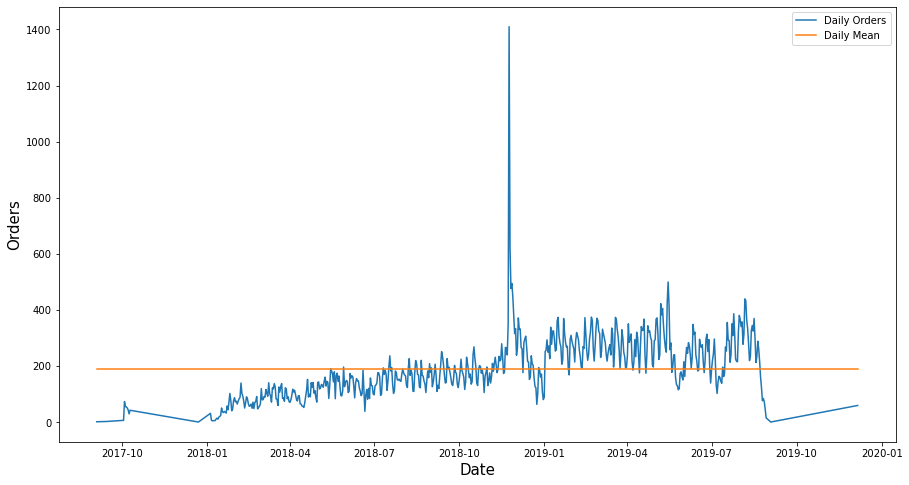

In [416]:
##Compute the Average Daily Orders. Plot Daily Orders + Average

avg_daily = orders_count.orders.mean()     #-->KPI 1: MEAN ORDER PER DAY:               

mean_line = [avg_daily]*len(orders_count.orders)
orders_count['avg_line']=mean_line

orders_count.plot(figsize=(15,8))
plt.xlabel('Date',fontsize=15)
plt.ylabel('Orders',fontsize=15)
L = plt.legend()
L.get_texts()[0].set_text('Daily Orders')
L.get_texts()[1].set_text('Daily Mean')

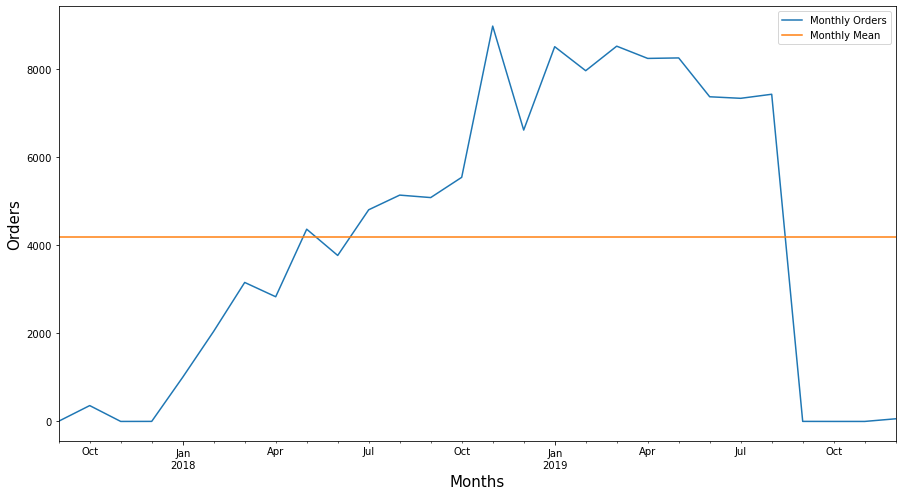

In [10]:
#Monthly Orders:
m = orders.groupby('ts_order_purchase')['order_status'].count().to_frame()   #re-use the dataframe 'orders' to avoid overlapping
m.rename(columns={'order_status':'orders'}, inplace=True)
m.index = pd.to_datetime(m.index)

monthly_orders = m.resample('M').sum()
monthly_orders.head()

avg_monthly = monthly_orders.orders.mean()            #-->KPI 2: MEAN ORDER PER MONTH                          

avg_line = [avg_monthly]*len(monthly_orders.orders)
monthly_orders['avg_line']=avg_line

monthly_orders.plot(figsize=(15,8))
plt.xlabel('Months',fontsize=15)
plt.ylabel('Orders',fontsize=15)
L = plt.legend()
L.get_texts()[0].set_text('Monthly Orders')
L.get_texts()[1].set_text('Monthly Mean')

In [424]:
monthly_orders.orders.to_frame().describe().style.format("{:,.0f}")

,orders
count,28
mean,"4,193"
std,"3,348"
min,0
25%,285
50%,"4,586"
75%,"7,386"
max,"8,977"


Text(0, 0.5, 'Days')

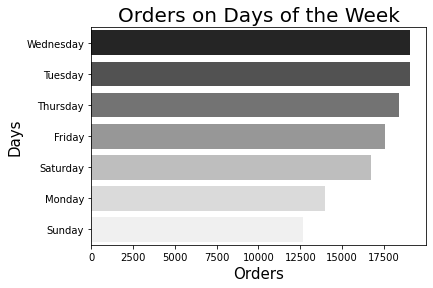

In [299]:
#Day of the Week Order:
d = orders.groupby('ts_order_purchase')['order_status'].count().to_frame()   #re-use the dataframe 'orders' to avoid overlapping
d.rename(columns={'order_status':'orders'}, inplace=True)
d.index = pd.to_datetime(d.index).day_name()

dayofweek = d.groupby(d.index)['orders'].sum().sort_values(ascending=False).to_frame()
sns.barplot(x=dayofweek.orders, y=dayofweek.index, data=dayofweek, palette='Greys_r')
plt.title('Orders on Days of the Week', fontsize=20)
plt.xlabel('Orders',fontsize=15)
plt.ylabel('Days',fontsize=15)

In [425]:
#Mean Order on each day of the week:
dmean = d.groupby(d.index)['orders'].mean().sort_values().to_frame()
pd.options.display.float_format = "{:,.2f}".format
dmean.rename(columns={'orders':'mean'},inplace=True)
dmean.index.rename('day_of_week', inplace=True)
dmean.style.format("{:,.0f}")

,mean
day_of_week,
Sunday,146
Monday,159
Saturday,190
Friday,197
Thursday,212
Tuesday,214
Wednesday,219


#### Customers are more likely to shop on midweek days - highest orders volumn from Tuesday to Thursday
#### Orders decrease gradually after Thursday - drop to its trough on Sunday
#### Sunday & Monday account for the lowest proportion of orders

---
<font size="6">KPIb. ITEMS PER ORDER

Text(0.5, 1.0, 'ITEMS PER ORDER')

<Figure size 2160x2160 with 0 Axes>

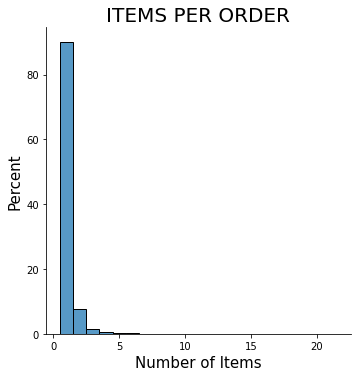

In [432]:
#Number of Items purchased per Order

items_per_order = df.groupby('order_id')['order_item_sequence_id'].max().sort_values().to_frame()

plt.figure(figsize=(30,30))
x = sns.displot(items_per_order, x="order_item_sequence_id", stat='percent',discrete=True)
plt.xlabel('Number of Items',fontsize = 15)
plt.ylabel('Percent', fontsize = 15)
plt.title('ITEMS PER ORDER', fontsize = 20)

In [14]:
freq_tab = items_per_order.order_item_sequence_id.value_counts().to_frame()
freq_tab.rename(columns={'order_item_sequence_id':'Frequency'}, inplace=True)
freq_tab.transpose()

,1,2,3,4,5,6,7,8,10,12,11,9,14,15,20,13,21
Frequency,88863,7516,1322,505,204,198,22,8,8,5,4,3,2,2,2,1,1


In [433]:
items_per_order.rename(columns={'order_item_sequence_id':'items_per_order'},inplace=True)
items_per_order.describe().style.format("{:,.0f}")

,items_per_order
count,"98,666"
mean,1
std,1
min,1
25%,1
50%,1
75%,1
max,21


#### Most of the customers purchased a single product
#### The number of items purchased per order decreases exponentially
#### Need to improve Recommendation Algorithm (i.e, suggest suplementary products to those who often buy a single item)

---
# KPIc. Delay & Worst Sellers

In [307]:
deliver = df[['seller_id','seller_city','seller_autonomous_community','order_id','order_item_sequence_id','order_status','ts_order_purchase','ts_order_delivered_cu stomer','ts_order_estimated_delivery','review_score']]
deliver = deliver[deliver['order_status'] == 'delivered']
deliver['ts_order_purchase'] = pd.to_datetime(df['ts_order_purchase'])
deliver['ts_order_delivered_customer'] = pd.to_datetime(df['ts_order_delivered_customer'])
deliver['ts_order_estimated_delivery'] = pd.to_datetime(df['ts_order_estimated_delivery'])
deliver['diff_delivered'] = deliver['ts_order_estimated_delivery'] - deliver['ts_order_delivered_customer']
deliver['diff_delivered'] = deliver['diff_delivered'].dt.days
deliver['delay'] = np.where(deliver['diff_delivered']<0,'Delay','On Time')
deliver = deliver.dropna()

# 1 Order can have different items, so "order_id" can be duplicated many times
# Duplicates of the column "order_id" will be dropped, the last element will be kept to see how many items in these orders
deliver = deliver.drop_duplicates(subset='order_id', keep = 'last')
deliver.head()

,seller_id,seller_city,seller_autonomous_community,order_id,order_item_sequence_id,order_status,ts_order_purchase,ts_order_delivered_customer,ts_order_estimated_delivery,review_score,diff_delivered,delay
Index,,,,,,,,,,,,
3,ecccfa2bb93b34a3bf033cc5d1dcdc69,Coruña,Galicia,bfbd0f9bdef84302105ad712db648a6c,3,delivered,2017-09-15 12:16:00,2017-11-09 07:47:00,2017-10-04,4.00,-37.00,Delay
4,b499c00f28f4b7069ff6550af8c1348a,Sevilla,Andalucía,cd3b8574c82b42fc8129f6d502690c3e,1,delivered,2017-10-03 22:31:00,2017-10-14 16:08:00,2017-11-23,5.00,39.00,On Time
5,624f4ece8da4aafb77699233d480f8ef,Madrid,Comunidad de Madrid,c3d9e402b6a0fbe2a5f7fc5b41117c38,1,delivered,2017-10-04 10:16:00,2017-11-08 10:41:00,2017-12-08,5.00,29.00,On Time
6,ce27a3cc3c8cc1ea79d11e561e9bebb6,Madrid,Comunidad de Madrid,c4b41c36dd589e901f6879f25a74ec1d,1,delivered,2017-10-04 12:53:00,2017-11-09 13:37:00,2017-11-24,1.00,14.00,On Time
8,939f6e231201f26803cb5c3a3d2940b3,Huelva,Andalucía,36989eb07a0de2d3d3129eea35553875,2,delivered,2017-10-04 13:11:00,2017-10-11 13:46:00,2017-12-06,5.00,55.00,On Time


([<matplotlib.patches.Wedge at 0x7fd9496b4ac0>,
 [Text(-1.065525654752043, 0.2732308164633522, 'On Time'),
  Text(1.0655256419611843, -0.27323086634420773, 'Delay')],
 [Text(-0.5811958116829326, 0.14903499079819207, '92%'),
  Text(0.5811958047061004, -0.14903501800593147, '8%')])

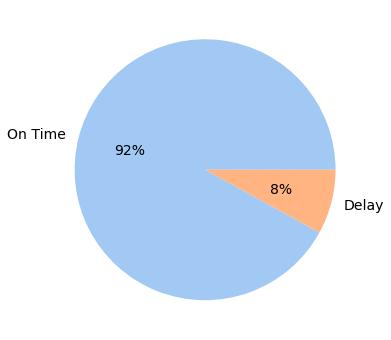

In [308]:
#Efficiency: Delay/Total Orders:
efficiency = deliver.delay.value_counts().to_frame()
efficiency.columns = ['efficiency']
labels = efficiency.index
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(15,6))
plt.pie(efficiency.efficiency, colors=colors, labels=labels, autopct='%.0f%%', textprops={'fontsize': 14})

In [302]:
day_delay = deliver[['ts_order_purchase','delay']]
day_delay.set_index('ts_order_purchase',inplace=True)
day_delay.index.rename('day_of_week',inplace=True)
day_delay.index=pd.to_datetime(day_delay.index).day_name()

day_delay = day_delay[ day_delay['delay'] == 'Delay']
day_delay_plot = day_delay.value_counts(subset=day_delay.index).to_frame()
day_delay_plot.columns = ['delay_count']
day_delay_plot

,delay_count
day_of_week,
Tuesday,1372
Wednesday,1281
Thursday,1144
Saturday,1125
Friday,1047
Monday,855
Sunday,773


Text(0, 0.5, 'Day of the Week')

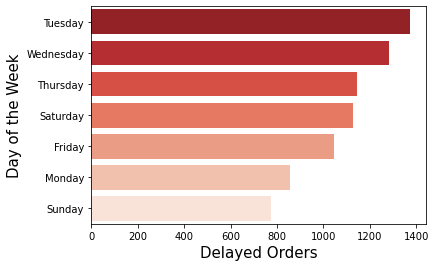

In [296]:
#sns.barplot(y=rev.index, x=rev['revenue'],palette = 'Reds_r')
#plt.title('Top 10 Revenue Generators', fontsize = 20)
sns.barplot(y=day_delay_plot.index, x=day_delay_plot.delay_count, palette='Reds_r')
plt.xlabel('Delayed Orders',fontsize=15)
plt.ylabel('Day of the Week',fontsize=15)

In [242]:
#Find Delayed Orders corresponding to their Order ID
delay = deliver[['seller_id','seller_city','order_id','order_item_sequence_id','seller_autonomous_community','delay','review_score']]
delay = delay[ delay['delay'] == 'Delay' ]
delay

,seller_id,seller_city,order_id,order_item_sequence_id,seller_autonomous_community,delay,review_score
Index,,,,,,,
3,ecccfa2bb93b34a3bf033cc5d1dcdc69,Coruña,bfbd0f9bdef84302105ad712db648a6c,3,Galicia,Delay,4.00
130,897060da8b9a21f655304d50fd935913,Granada,5cc475c7c03290048eb2e742cd64cb5e,1,Andalucía,Delay,2.00
743,ecccfa2bb93b34a3bf033cc5d1dcdc69,Coruña,b0cfee6ce5503781be6004e0e31e4309,1,Galicia,Delay,5.00
859,b14db04aa7881970e83ffa9426897925,Sevilla,89898719573722b59b173f76fb213501,1,Andalucía,Delay,5.00
867,1554a68530182680ad5c8b042c3ab563,Mostoles,81e5043198a44ddeb226002ff55d8ad4,2,Comunidad de Madrid,Delay,4.00
...,...,...,...,...,...,...,...
117771,13dd308f81fea30cc670c656b2b46cc3,Granada,734fd23f82c457088580cf5a8c9da909,1,Andalucía,Delay,5.00
117804,16090f2ca825584b5a147ab24aa30c86,Cádiz,c469458d116f862637d6c26ae62ff8f2,1,Andalucía,Delay,5.00
117838,6560211a19b47992c3666cc44a7e94c0,Madrid,6cbc2c3a5ded4eb0fed3a011b02c6eeb,1,Comunidad de Madrid,Delay,4.00


In [190]:
#WORST SELLERS
worst = delay.groupby(['seller_autonomous_community','seller_city','seller_id']).agg({'delay':['count'], 'review_score':['mean']})
worst = worst.sort_values(by=[('delay','count')])

In [330]:
worst.tail(10).style.format("{:,.0f}")

---
# KPId. Best Sellers & Customers (in terms of Revenue)

In [400]:
#Subset the original Dataframe
best = df[['seller_id','customer_unique_id','customer_city','customer_autonomous_community','seller_city','seller_autonomous_community','order_id','order_item_sequence_id','order_status','price','shipping_cost','review_score']]

#Adding price with shipping cost to get Gross Revenue
best['gross_revenue'] = best['price'] + best['shipping_cost']
best = best.drop_duplicates(subset='order_id',keep='first')

#Delete 'canceled' & 'unavailable' orders because they don't generate revenue
best = best[ best['order_status'] != 'canceled']
best = best[ best['order_status'] != 'unavailable']
best.head()

/var/folders/y9/nklz28892c1701x7x87ypcjr0000gn/T/ipykernel_7823/1291682277.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best['gross_revenue'] = best['price'] + best['shipping_cost']


,seller_id,customer_unique_id,customer_city,customer_autonomous_community,seller_city,seller_autonomous_community,order_id,order_item_sequence_id,order_status,price,shipping_cost,review_score,gross_revenue
Index,,,,,,,,,,,,,
1,ecccfa2bb93b34a3bf033cc5d1dcdc69,830d5b7aaa3b6f1e9ad63703bec97d23,Almería,Andalucía,Coruña,Galicia,bfbd0f9bdef84302105ad712db648a6c,1,delivered,4499,283,4.0,4782
4,b499c00f28f4b7069ff6550af8c1348a,87776adb449c551e74c13fc34f036105,Sevilla,Andalucía,Sevilla,Andalucía,cd3b8574c82b42fc8129f6d502690c3e,1,delivered,2999,1096,5.0,4095
5,624f4ece8da4aafb77699233d480f8ef,9f302d00dd3e18ed3745778184b4f0fe,Mérida,Extremadura,Madrid,Comunidad de Madrid,c3d9e402b6a0fbe2a5f7fc5b41117c38,1,delivered,189,4845,5.0,5034
6,ce27a3cc3c8cc1ea79d11e561e9bebb6,3f4f614c632af7fc7508462a7cb55ac2,Madrid,Comunidad de Madrid,Madrid,Comunidad de Madrid,c4b41c36dd589e901f6879f25a74ec1d,1,delivered,99,872,1.0,971
7,939f6e231201f26803cb5c3a3d2940b3,f176923a0a4ab546c7287791ccb82193,Gijón,Principado de Asturias,Huelva,Andalucía,36989eb07a0de2d3d3129eea35553875,1,delivered,239,2682,5.0,2921


In [351]:
#Group Sellers with the most sales, corresponding to their region & review score
bests = best.groupby(['seller_autonomous_community',
                      'seller_city','seller_id']).agg({
    'gross_revenue':['sum'],
    'review_score':['mean']
})

#Sort sales to find the Best Seller
bests = bests.sort_values(by=[('gross_revenue','sum')])
bests.tail(10).style.format("{:,.0f}")

In [398]:
#Group Customers who spent a lot:
bestc = best.groupby(['customer_autonomous_community','customer_city','customer_unique_id']).agg({
    'gross_revenue':['sum'],
    'order_item_sequence_id':['sum']
})

#bestc = bestc.sort_values(by=[('gross_revenue', 'sum')])
bestc = bestc.rename(columns={'gross_revenue':'amount_paid','order_item_sequence_id':'orders_purchased'})
bestc = bestc.sort_values(by=[('amount_paid','sum')])

bestc.tail(10).style.format("{:,.0f}")

,,,amount_paid,orders_purchased
,,,sum,sum
customer_autonomous_community,customer_city,customer_unique_id,,
Cantabria,Santander,0f75637a7e2f7b6ae43665d1f7d0ca5d,"304,412",1
País Vasco,San Sebastián,ff0ae98646e7bbb41cf0f0d3991fef98,"304,827",1
Islas Canarias,Las Palmas de Gran Canaria,58c1b085b54c03a1f1ab5f13d64c2b1c,"306,472",2
Cataluña,Gerona,c6111f70f40b3420e387493c627c27fa,"312,650",1
Galicia,Coruña,895617ab63a9ad8881d9470f7427cd25,"312,650",1
Castilla y León,Valladolid,46450c74a0d8c5ca9395da1daac6c120,"318,434",1
Andalucía,Sevilla,2c3b08cf3584d8c0a81d9618a73aa219,"352,646",1
Región de Murcia,Murcia,5d09b0d82126457e2a8ebfb9c9a1ffc4,"373,622",1


In [409]:
#Subset variables relating to Products
besti = df[['product_category_name','product_id','order_id','order_item_sequence_id','order_status','price','shipping_cost','review_score']]
besti = besti[ besti['order_status'] != 'canceled']
besti = besti[ besti['order_status'] != 'unavailable']
besti['gross_revenue'] = besti['price'] + besti['shipping_cost']


,product_category_name,product_id,order_id,order_item_sequence_id,order_status,price,shipping_cost,review_score,gross_revenue
Index,,,,,,,,,
1,beauty & personal care,5a6b04657a4c5ee34285d1e4619a96b4,bfbd0f9bdef84302105ad712db648a6c,1,delivered,4499,283,4.0,4782
2,beauty & personal care,5a6b04657a4c5ee34285d1e4619a96b4,bfbd0f9bdef84302105ad712db648a6c,2,delivered,4499,283,4.0,4782
3,beauty & personal care,5a6b04657a4c5ee34285d1e4619a96b4,bfbd0f9bdef84302105ad712db648a6c,3,delivered,4499,283,4.0,4782
4,handbags & accessories,e2a1d45a73dc7f5a7f9236b043431b89,cd3b8574c82b42fc8129f6d502690c3e,1,delivered,2999,1096,5.0,4095
5,furniture,817e1c2d22418c36386406ccacfa53e8,c3d9e402b6a0fbe2a5f7fc5b41117c38,1,delivered,189,4845,5.0,5034
...,...,...,...,...,...,...,...,...,...
118138,automotive,17e18b0c88a853dd6de3e48a7cfa9d9a,7cfdf7265c9572fc7b7cbd3b9cc438b7,2,delivered,20,1925,1.0,1945
118139,kitchen & dining,6aa063e063f2ab982b471e58afe06d72,3b61aab5de69abc1731138bd104a777f,1,delivered,99999,2477,2.0,102476
118140,home accessories,282b126b2354516c5f400154398f616d,9c94a4ea2f7876660fa6f1b59b69c8e6,1,shipped,7599,147,5.0,7746


In [413]:
#Best Items:
best_item = besti.groupby(['product_category_name','product_id']).agg({
    'gross_revenue':['sum'],
    'review_score':['mean'],
    'shipping_cost':['mean']
})
best_item = best_item.sort_values(by=[('gross_revenue','sum')])
best_item.tail(10).style.format("{:,.0f}")